## Decomposição de Séries Temporais

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

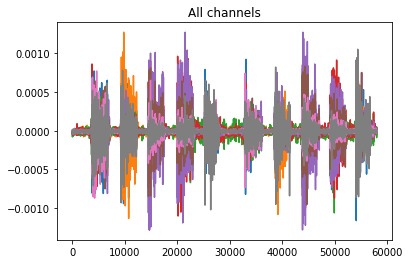

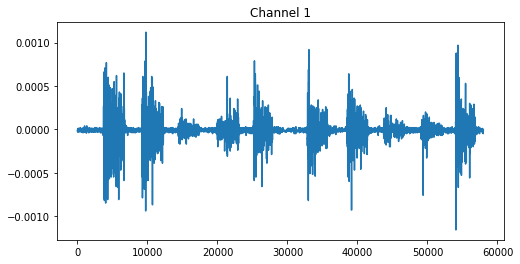

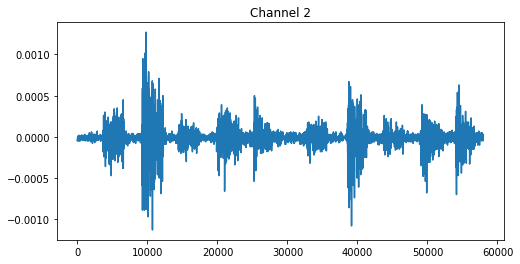

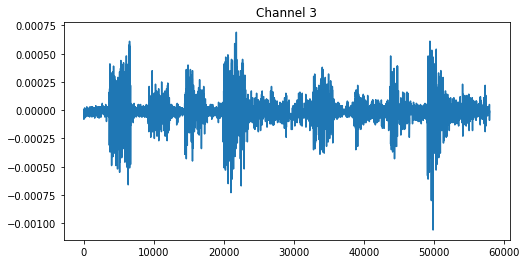

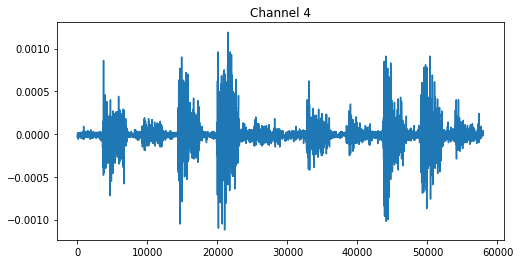

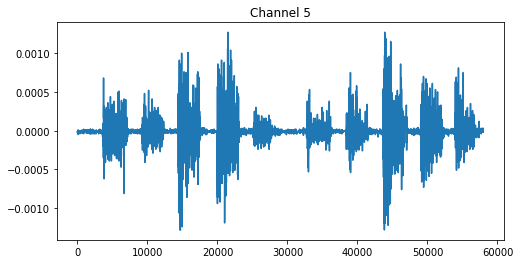

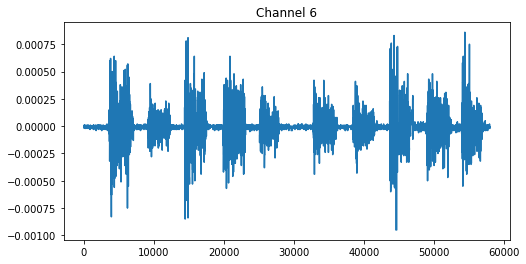

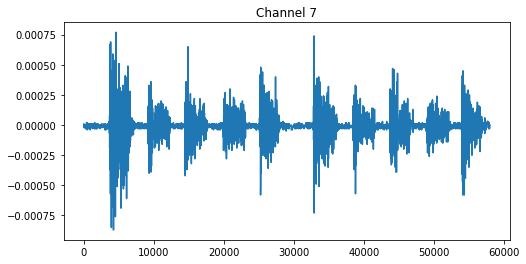

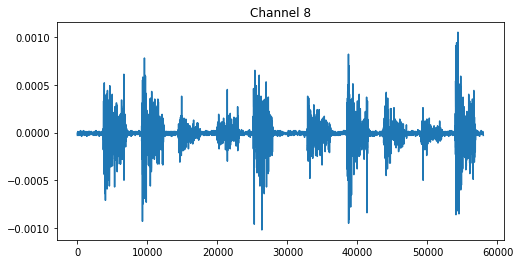

In [22]:
path =  '2_raw_data_13-13_22.03.16.txt'

df = pd.read_csv(path, delimiter='\t')

# Exibindo os canais em formato de série temporal dos primeiros 400 registros
for i in range(8):
    plt.plot(df['channel' + str(i + 1)])
    plt.title('All channels')

for i in range(8):
    plt.figure(figsize=(8, 4))  # Tamanho da nova figura
    plt.plot(df['channel' + str(i + 1)])
    plt.title('Channel ' + str(i + 1))


Há uma sazonalidade, mas qual é o tamanho?
Uma abordagem comum é fazer o detrend primeiro, para facilitar a visualização.